In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import itertools

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseData = pd.read_csv(mouse_drug_data_to_load)
trialData = pd.read_csv(clinical_trial_data_to_load)
trialData.head()

 #Combine the data into a single dataset
data = round(mouseData.merge(trialData, on = "Mouse ID"), 2)
#data["Metastatic Sites"] = pd.to_numeric(data["Metastatic Sites"]).astype(float)
data.head()
 #Display the data table for preview
#stuff = data.columns.tolist()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.00,0
1,f234,Stelasyn,5,47.31,0
2,f234,Stelasyn,10,47.90,0
3,f234,Stelasyn,15,48.74,1
4,f234,Stelasyn,20,51.11,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
print("Average Tumor Length by Volume (mm3)")
timearr = data["Timepoint"].unique()
types = data["Drug"].unique()
timedf = pd.DataFrame({"Timepoint":timearr})
for i in types:
    drugArr = []   
    for j in timearr:
        drugArr.append(data.loc[(data['Drug'] == i) & (data["Timepoint"] == j)]['Tumor Volume (mm3)'].mean())
    timedf[i] = drugArr
timedf.set_index('Timepoint', inplace = True)
timedf.head()
# Convert to DataFrame

# Preview DataFrame


Average Tumor Length by Volume (mm3)


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000
5,47.526800,47.248000,46.796957,47.388261,44.265600,47.061600,46.503333,46.851250,43.94600,47.126250
10,49.463913,49.102609,48.694286,49.582727,43.083600,49.403333,48.284000,48.690000,42.53125,49.422917
15,51.530435,51.067647,50.932857,52.400526,42.063333,51.296667,50.093684,50.778571,41.49500,51.360000
20,54.067619,53.346471,53.643000,54.922105,40.717391,53.198000,52.157778,53.169412,40.24000,54.365263


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
print("Standard error of Tumor Volumes")
errordf = pd.DataFrame({"Timepoint":timearr})
for i in types:
    drugErr = []    
    for j in timearr:
        drugErr.append(data.loc[(data['Drug'] == i) & (data["Timepoint"] == j)]['Tumor Volume (mm3)'].sem())
    errordf[i] = drugErr
errordf.set_index('Timepoint', inplace = True)
errordf.head()

# Convert to DataFrame

# Preview DataFrame



Standard error of Tumor Volumes


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.239919,0.231706,0.202384,0.264832,0.448570,0.234978,0.164556,0.188832,0.483044,0.218126
10,0.433637,0.375957,0.319417,0.357634,0.702694,0.282474,0.236249,0.263994,0.720276,0.402002
15,0.493265,0.466169,0.443881,0.580298,0.838700,0.357870,0.332097,0.370540,0.770442,0.614250
20,0.622252,0.555215,0.595557,0.726699,0.909475,0.475967,0.359686,0.533143,0.786342,0.839555


In [4]:
index = timedf.index.tolist()


In [5]:
# Minor Data Munging to Re-Format the Data Frames
yval = timedf.columns.values.tolist()
errbar = errordf.columns.values.tolist()
print("Merged Data for Tumor Volume")
#errordf.reset_index(inplace = True)
#timedf.reset_index(inplace = True)
groupmean = data.groupby(["Timepoint", "Drug"], as_index = True).agg({'Tumor Volume (mm3)': ['mean'], 'Metastatic Sites': ['mean']})
grouperr = data.groupby(["Timepoint", "Drug"], as_index = True).agg({'Tumor Volume (mm3)': ['std'], 'Metastatic Sites': ['std']})
group = groupmean.merge(grouperr, on = ["Timepoint", "Drug"])
group

# Preview that Reformatting worked


Merged Data for Tumor Volume


Tumor Volume (mm3) Metastatic Sites Tumor Volume (mm3)  \
                                  mean             mean                std   
Timepoint Drug                                                               
0         Capomulin          45.000000         0.000000           0.000000   
          Ceftamin           45.000000         0.000000           0.000000   
          Infubinol          45.000000         0.000000           0.000000   
          Ketapril           45.000000         0.000000           0.000000   
          Naftisol           45.000000         0.000000           0.000000   
          Placebo            45.000000         0.000000           0.000000   
          Propriva           45.000000         0.000000           0.000000   
          Ramicane           45.000000         0.000000           0.000000   
          Stelasyn           45.000000         0.000000           0.000000   
          Zoniferol          45.000000         0.000000           0.000000   
5         Capomulin          44.265600         0.160000           2.242850   
          Ceftamin           46.503333         0.380952           0.754091   
          Infubinol          47.061600         0.280000           1.174889   
          Ketapril           47.388261         0.304348           1.270088   
          Naftisol           46.796957         0.260870           0.970602   
          Placebo            47.126250         0.375000           1.068594   
          Propriva           47.248000         0.320000           1.158530   
          Ramicane           43.946000         0.120000           2.415221   
          Stelasyn           47.526800         0.240000           1.199593   
          Zoniferol          46.851250         0.166667           0.925082   
10        Capomulin          43.083600         0.320000           3.513468   
          Ceftamin           48.284000         0.600000           1.056536   
          Infubinol          49.403333         0.666667           1.294459   
          Ketapril           49.582727         0.590909           1.677450   
          Naftisol           48.694286         0.523810           1.463751   
          Placebo            49.422917         0.833333           1.969402   
          Propriva           49.102609         0.565217           1.803026   
          Ramicane           42.531250         0.250000           3.528616   
          Stelasyn           49.463913         0.478261           2.079652   
          Zoniferol          48.690000         0.500000           1.238244   
...                                ...              ...                ...   
35        Capomulin          37.816818         1.181818           4.934918   
          Ceftamin           58.827143         2.071429           2.590279   
          Infubinol          60.741667         1.666667           3.409961   
          Ketapril           63.371765         2.294118           4.651294   
          Naftisol           62.686000         2.266667           3.926454   
          Placebo            62.419286         2.642857           4.818221   
          Propriva           60.350000         2.300000           3.431187   
          Ramicane           37.452381         0.952381           4.433081   
          Stelasyn           62.441250         1.562500           4.013293   
          Zoniferol          60.089286         2.285714           3.298810   
40        Capomulin          36.958095         1.380952           5.607492   
          Ceftamin           61.467857         2.357143           2.649212   
          Infubinol          63.164000         2.100000           3.336546   
          Ketapril           66.068667         2.733333           4.487694   
          Naftisol           65.601333         2.466667           4.330353   
          Placebo            65.052500         3.166667           4.748682   
          Propriva           63.044444         2.777778           4.694369   
          Ramicane           36.573500    

In [6]:
groupies = data.groupby(["Timepoint", "Drug"], as_index = True)
err = groupies.std()
avg = groupies.mean()


Text(0,0.5,'Average Tumor Volume (mm3)')

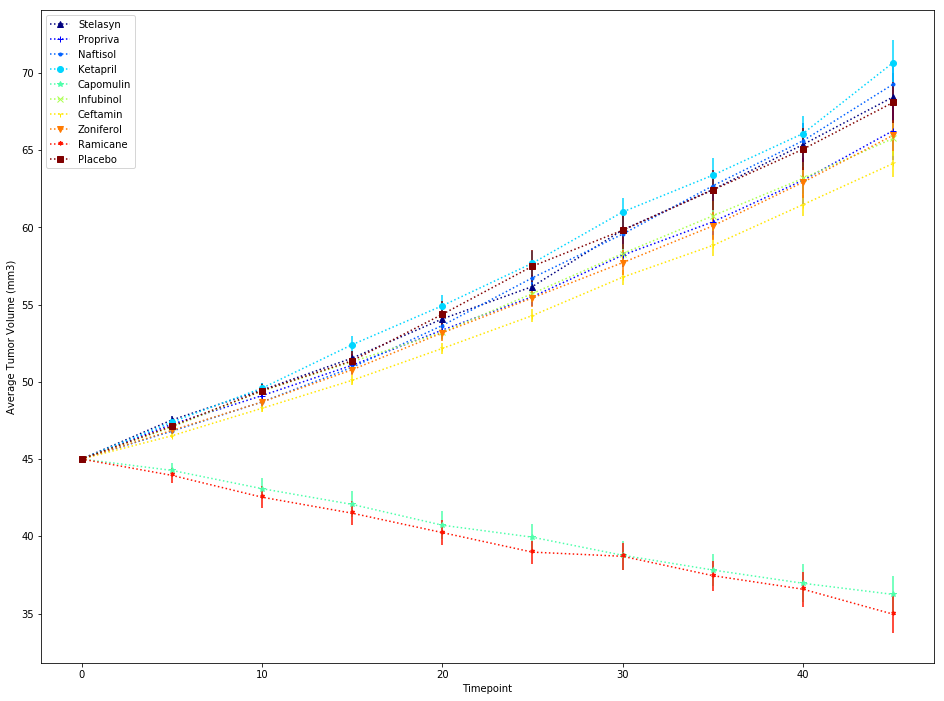

In [64]:
# Generate the Plot (with Error Bars)
#timedf.reset_index(inplace = True)

markers = itertools.cycle(('^', '+', '.', 'o', '*', 'x', '1', 'v', '$*$', 's')) 

fig, ax = plt.subplots()

timedf.plot(yerr=errordf, ax=ax, figsize = (16, 12), kind = 'line', ls = ':', marker = 'o', colormap = 'jet')
for i, line in enumerate(ax.get_lines()):
    line.set_marker(next(markers))

# for adding legend
ax.legend(ax.get_lines(), timedf.columns, loc='best')

ax.set_xlabel("Timepoint")
ax.set_ylabel("Average Tumor Volume (mm3)")

#plt.show()
# Save the Figure



In [43]:
# Show the Figure



## Metastatic Response to Treatment

In [44]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
print("Average number of Metastatic sites")
metamean = pd.DataFrame({"Timepoint":timearr})
for i in types:
    drugMeta = []   
    for j in timearr:
        drugMeta.append(data.loc[(data['Drug'] == i) & (data["Timepoint"] == j)]['Metastatic Sites'].mean())
    metamean[i] = drugMeta
metamean.set_index('Timepoint', inplace = True)
metamean.head()

# Preview DataFrame


Average number of Metastatic sites


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.240000,0.320000,0.260870,0.304348,0.160000,0.280000,0.380952,0.166667,0.120000,0.375000
10,0.478261,0.565217,0.523810,0.590909,0.320000,0.666667,0.600000,0.500000,0.250000,0.833333
15,0.782609,0.764706,0.857143,0.842105,0.375000,0.904762,0.789474,0.809524,0.333333,1.250000
20,0.952381,1.000000,1.150000,1.210526,0.652174,1.050000,1.111111,1.294118,0.347826,1.526316


In [45]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
print("Standard Error of Metastatic Sites")
# Convert to DataFrame
metaerr = pd.DataFrame({"Timepoint":timearr})
for i in types:
    drugMeta = []   
    for j in timearr:
        drugMeta.append(data.loc[(data['Drug'] == i) & (data["Timepoint"] == j)]['Metastatic Sites'].sem())
    metaerr[i] = drugMeta
metaerr.set_index('Timepoint', inplace = True)
metaerr.head()
# Preview DataFrame


Standard Error of Metastatic Sites


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.087178,0.095219,0.093618,0.098100,0.074833,0.091652,0.108588,0.077709,0.066332,0.100947
10,0.123672,0.105690,0.163577,0.142018,0.125433,0.159364,0.152177,0.109109,0.090289,0.115261
15,0.153439,0.136377,0.158651,0.191381,0.132048,0.194015,0.180625,0.111677,0.115261,0.190221
20,0.200905,0.171499,0.181731,0.236680,0.161621,0.234801,0.241034,0.166378,0.119430,0.234064


In [46]:
#metamean.reset_index(inplace = True)
#metaerr.reset_index(inplace = True)

In [47]:
# Minor Data Munging to Re-Format the Data Frames
bigmeta = metamean.merge(metaerr, on = "Timepoint")
# Preview that Reformatting worked
bigmeta

,Stelasyn_x,Propriva_x,Naftisol_x,Ketapril_x,Capomulin_x,Infubinol_x,Ceftamin_x,Zoniferol_x,Ramicane_x,Placebo_x,Stelasyn_y,Propriva_y,Naftisol_y,Ketapril_y,Capomulin_y,Infubinol_y,Ceftamin_y,Zoniferol_y,Ramicane_y,Placebo_y
Timepoint,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.240000,0.320000,0.260870,0.304348,0.160000,0.280000,0.380952,0.166667,0.120000,0.375000,0.087178,0.095219,0.093618,0.098100,0.074833,0.091652,0.108588,0.077709,0.066332,0.100947
10,0.478261,0.565217,0.523810,0.590909,0.320000,0.666667,0.600000,0.500000,0.250000,0.833333,0.123672,0.105690,0.163577,0.142018,0.125433,0.159364,0.152177,0.109109,0.090289,0.115261
15,0.782609,0.764706,0.857143,0.842105,0.375000,0.904762,0.789474,0.809524,0.333333,1.250000,0.153439,0.136377,0.158651,0.191381,0.132048,0.194015,0.180625,0.111677,0.115261,0.190221
20,0.952381,1.000000,1.150000,1.210526,0.652174,1.050000,1.111111,1.294118,0.347826,1.526316,0.200905,0.171499,0.181731,0.236680,0.161621,0.234801,0.241034,0.166378,0.119430,0.234064
25,1.157895,1.357143,1.500000,1.631579,0.818182,1.277778,1.500000,1.687500,0.652174,1.941176,0.219824,0.199095,0.185240,0.288275,0.181818,0.265753,0.258831,0.236621,0.119430,0.263888
30,1.388889,1.615385,2.066667,2.055556,1.090909,1.588235,1.937500,1.933333,0.782609,2.266667,0.230641,0.266469,0.266667,0.347467,0.172944,0.227823,0.249479,0.248168,0.139968,0.300264
35,1.562500,2.300000,2.266667,2.294118,1.181818,1.666667,2.071429,2.285714,0.952381,2.642857,0.240983,0.366667,0.330464,0.361418,0.169496,0.224733,0.266526,0.285714,0.145997,0.341412
40,1.583333,2.777778,2.466667,2.733333,1.380952,2.100000,2.357143,2.785714,1.100000,3.166667,0.312815,0.433903,0.321702,0.315725,0.175610,0.314466,0.289128,0.299791,0.160591,0.297294


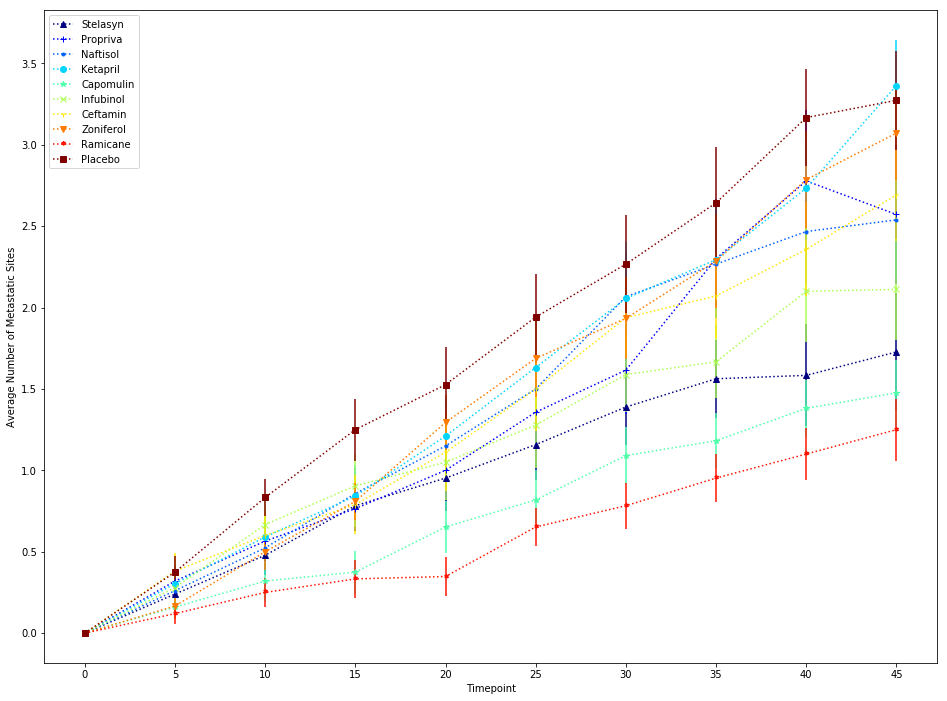

In [65]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

metamean.plot(yerr=metaerr, ax=ax, xticks = index, figsize = (16, 12), kind = 'line', ls = ':', marker = 'o', colormap = 'jet')

ax.set_xlabel("Timepoint")
ax.set_ylabel("Average Number of Metastatic Sites")
for i, line in enumerate(ax.get_lines()):
    line.set_marker(next(markers))

ax.legend(ax.get_lines(), timedf.columns, loc='best')
# Save the Figure

# Show the Figure


## Survival Rates

In [54]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount = pd.DataFrame({"Timepoint":timearr})
for i in types:
    mouses = []    
    for j in timearr:
        mouses.append(data.loc[(data['Drug'] == i) & (data["Timepoint"] == j)]['Mouse ID'].count())
    mousecount[i] = mouses
mousecount.set_index('Timepoint', inplace = True)
mousecount
# Convert to DataFrame

# Preview DataFrame


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,26,26,25,25,25,25,25,25,25,25
5,25,25,23,23,25,25,21,24,25,24
10,23,23,21,22,25,21,20,22,24,24
15,23,17,21,19,24,21,19,21,24,20
20,21,17,20,19,23,20,18,17,23,19
25,19,14,18,19,22,18,18,16,23,17
30,18,13,15,18,22,17,16,15,23,15
35,16,10,15,17,22,12,14,14,21,14
40,12,9,15,15,21,10,14,14,20,12


In [55]:
mousemean = data.groupby(["Timepoint", "Drug"], as_index = True).agg({'Mouse ID': ['count']})
mousemean.head()

Mouse ID
                       count
Timepoint Drug              
0         Capomulin       25
          Ceftamin        25
          Infubinol       25
          Ketapril        25
          Naftisol        25

In [56]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

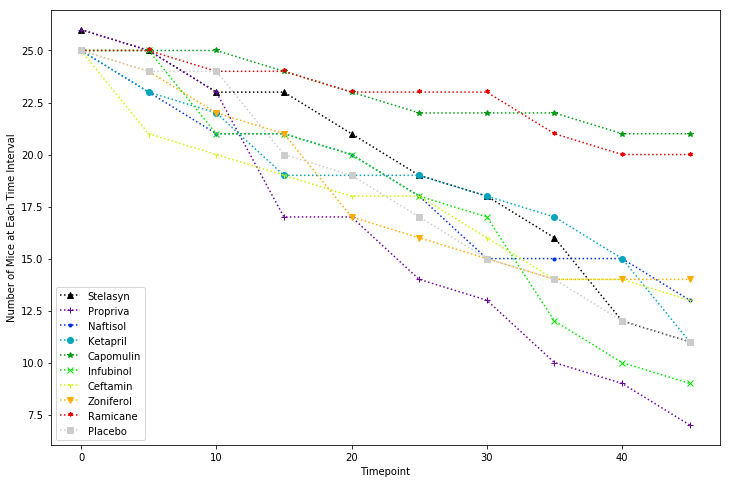

In [69]:
fig, ax = plt.subplots()

mousecount.plot(ax = ax, ls = ":", marker = "H", colormap = 'nipy_spectral', figsize = (12,8))
ax.set_xlabel("Timepoint")
ax.set_ylabel("Number of Mice at Each Time Interval")
for i, line in enumerate(ax.get_lines()):
    line.set_marker(next(markers))
ax.legend(ax.get_lines(), timedf.columns, loc='best')

In [58]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [59]:
# Calculate the percent changes for each drug
tumorchange = timedf.pct_change()
tumorchange
# Display the data to confirm


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.056151,0.049956,0.039932,0.053072,-0.016320,0.045813,0.033407,0.041139,-0.023422,0.047250
10,0.040758,0.039253,0.040544,0.046308,-0.026702,0.049759,0.038291,0.039247,-0.032193,0.048734
15,0.041778,0.040019,0.045972,0.056830,-0.023681,0.038324,0.037480,0.042895,-0.024364,0.039194
20,0.049237,0.044624,0.053210,0.048121,-0.031998,0.037065,0.041205,0.047084,-0.030245,0.058514
25,0.038806,0.040462,0.057599,0.050195,-0.019092,0.047303,0.040848,0.042587,-0.031463,0.057336
30,0.065180,0.048471,0.049811,0.057482,-0.029317,0.046386,0.045690,0.041111,-0.006939,0.040482
35,0.043703,0.037024,0.052508,0.038976,-0.024563,0.041902,0.036259,0.041180,-0.032325,0.043638
40,0.046664,0.044647,0.046507,0.042557,-0.022707,0.039879,0.044889,0.047049,-0.023467,0.042186


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()